In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


In [ ]:
/kaggle/input/yamlfile/data.yaml

In [ ]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 100 \
  --data /kaggle/input/yamlfile/data.yaml \
  --weights yolov5s.pt \
  --cache \
  --project /kaggle/working/yolo_results \
  --name clc-xray-yolov5s


In [ ]:
from IPython.display import Image, display

base_path = "/kaggle/working/yolo_results/clc-xray-yolov5s"

metric_imgs = [
    "results.png",
    "P_curve.png",
    "R_curve.png",
    "PR_curve.png",
    "F1_curve.png",
    "confusion_matrix.png"
]

for img in metric_imgs:
    print(f"📊 {img}")
    display(Image(filename=f"{base_path}/{img}"))

In [ ]:
!python val.py \
  --data /kaggle/input/yamlfile/data.yaml \
  --weights /kaggle/working/yolo_results/clc-xray-yolov5s/weights/best.pt \
  --task test \
  --img 640 \
  --project /kaggle/working/yolo_results \
  --name test-eval


In [ ]:
import os
from IPython.display import Image, display

val_output_dir = "/kaggle/working/yolo_results/test-eval"
plots = [
    "confusion_matrix.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
    "PR_curve.png",
    "labels.jpg"
]

for plot in plots:
    file_path = os.path.join(val_output_dir, plot)
    if os.path.exists(file_path):
        display(Image(filename=file_path))
    else:
        print(f"Missing: {plot}")


In [ ]:
!python detect.py \
  --weights /kaggle/working/yolo_results/clc-xray-yolov5s/weights/best.pt \
  --source /kaggle/input/xray-clc/test/images \
  --img 640 \
  --conf 0.25 \
  --save-txt \
  --save-conf \
  --project /kaggle/working/yolo_results \
  --name test-predictions \
  --exist-ok


In [ ]:
import os
from IPython.display import Image, display

results_path = "/kaggle/working/yolo_results/test-predictions"
image_files = [f for f in os.listdir(results_path) if f.endswith(('.jpg', '.png'))]

for img_file in image_files[:5]:  # Show first 5 predictions
    display(Image(filename=os.path.join(results_path, img_file)))


In [ ]:
!zip -r /kaggle/working/yolo_outputs.zip /kaggle/working/yolo_results


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 16.6 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO
YOLO('yolov8s.pt')  # Load a pretrained model to check if the installation is correct


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
!yolo task=detect mode=train \
  model=yolov8s.pt \
  data=/kaggle/input/yamlfile/data.yaml \
  epochs=100 \
  imgsz=640 \
  batch=16 \
  project=/kaggle/working/yolo_results_v8 \
  name=clc-xray-yolov8s \
  save=True


Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/yamlfile/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/yolo_results_v8, name=clc-xray-yolov8s2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [20]:
import pandas as pd

results_path = "/kaggle/working/yolo_results_v8/clc-xray-yolov8s2/results.csv"
df = pd.read_csv(results_path)
df.columns = df.columns.str.strip()  # Strip whitespace
print(df.columns.tolist())


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


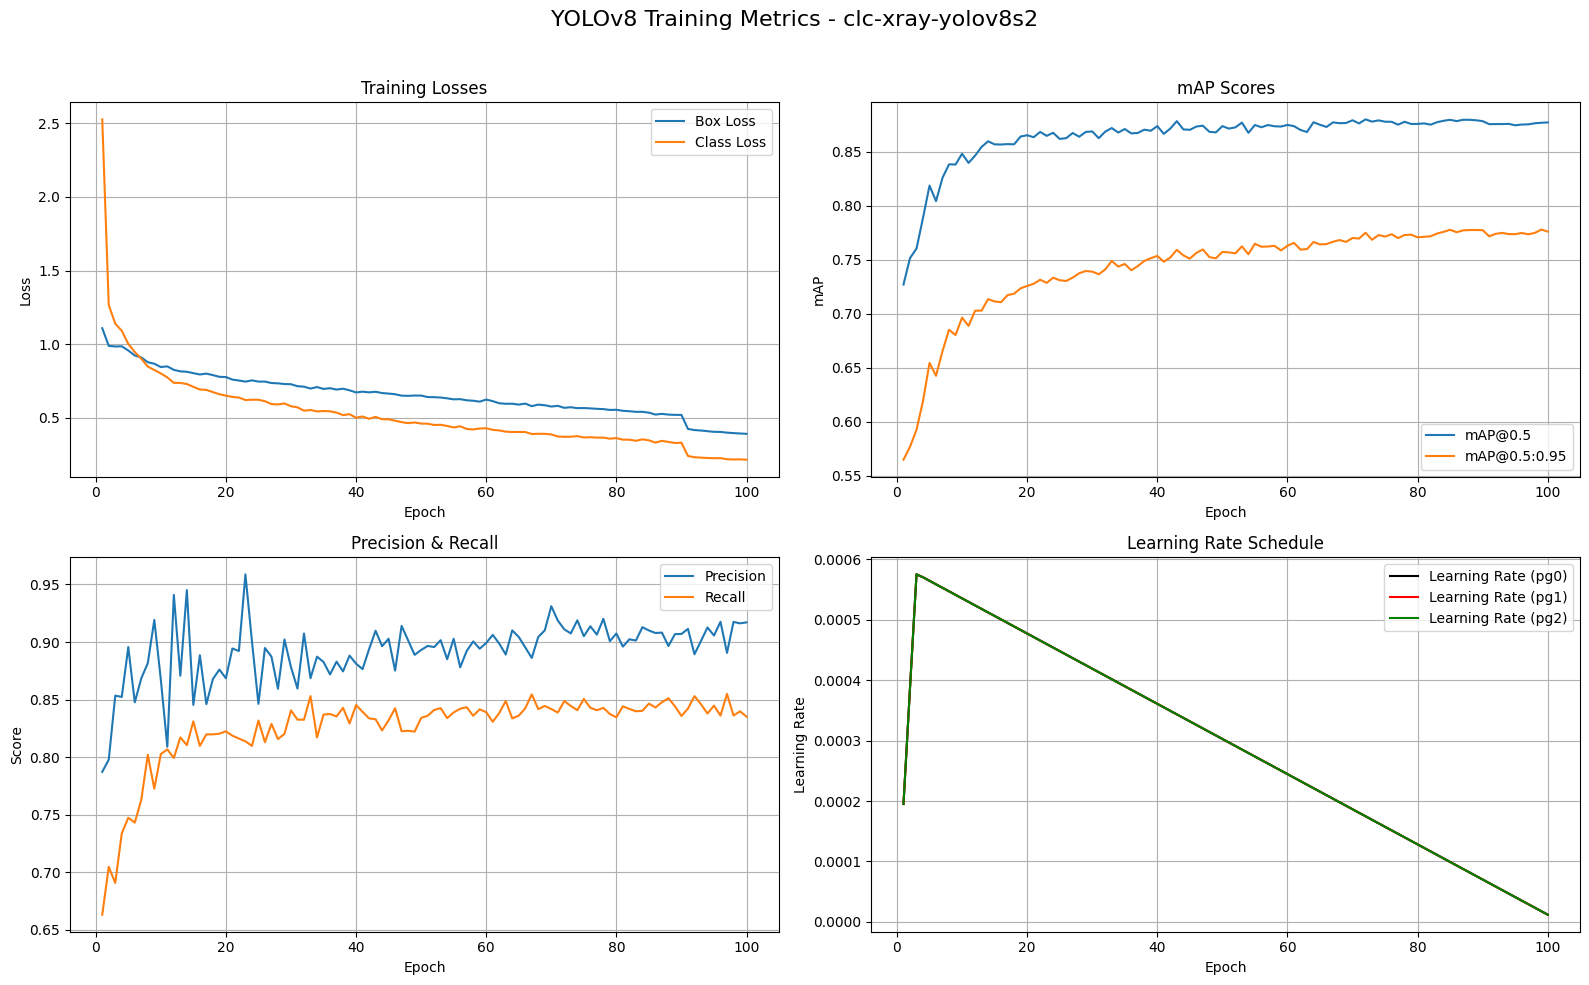

In [21]:
import matplotlib.pyplot as plt

# Strip column names to remove any spaces
df.columns = df.columns.str.strip()

# Set up the figure and subplots
plt.figure(figsize=(16, 10))

# 1. Training Losses (Box Loss & Class Loss)
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 2. mAP Scores (mAP50 and mAP50-95)
plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.title('mAP Scores')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.grid(True)
plt.legend()

# 3. Precision & Recall
plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

# 4. Learning Rate (Using 'lr/pg0', 'lr/pg1', 'lr/pg2' for different parameter groups)
plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['lr/pg0'], label='Learning Rate (pg0)', color='black')
plt.plot(df['epoch'], df['lr/pg1'], label='Learning Rate (pg1)', color='red')
plt.plot(df['epoch'], df['lr/pg2'], label='Learning Rate (pg2)', color='green')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.legend()

# Final adjustments for the layout
plt.suptitle("YOLOv8 Training Metrics - clc-xray-yolov8s2", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [13]:
!yolo task=detect mode=predict \
  model=/kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/best.pt \
  source=/kaggle/input/xray-clc/test/images \
  imgsz=640 \
  project=/kaggle/working/yolo_results_v8 \
  name=test-predictions


Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

image 1/956 /kaggle/input/xray-clc/test/images/05_20_27_625_png.rf.1b267931baa1f6e5d48667f95695d374.jpg: 640x608 1 VacuumCup, 41.9ms
image 2/956 /kaggle/input/xray-clc/test/images/05_24_05_796_png.rf.6194ae409d5a6b35cae0cea21bab968e.jpg: 640x480 2 PlasticBottles, 38.6ms
image 3/956 /kaggle/input/xray-clc/test/images/05_24_40_875_png.rf.9df32b927a67834ac6efc6631c0798d2.jpg: 640x640 (no detections), 16.9ms
image 4/956 /kaggle/input/xray-clc/test/images/05_25_25_703_png.rf.b3ffc7590a2072577e2c6a62a66c73dd.jpg: 640x640 2 VacuumCups, 16.2ms
image 5/956 /kaggle/input/xray-clc/test/images/05_27_15_406_png.rf.af1ec5b23304c5086affa15bbacd953a.jpg: 640x640 1 VacuumCup, 16.3ms
image 6/956 /kaggle/input/xray-clc/test/images/05_29_34_453_png.rf.b4ab31f1dd47ba90e59109ed8fbb45b0.jpg: 352x640 1 PlasticBottle, 1 VacuumCup, 40.6ms
image 7/9

In [7]:
!yolo task=detect mode=test model=/kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/best.pt data=/kaggle/input/yamlfile/data.yaml imgsz=640 project=/kaggle/working/yolo_results name=test-eval


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 922, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=test'. Valid modes are frozenset({'benchmark', 'track', 'val', 'predict', 'export', 'train'}).

    Arguments received: ['yolo', 'task=detect', 'mode=test', 'model=/kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/best.pt', 'data=/kaggle/input/yamlfile/data.yaml', 'imgsz=640', 'project=/kaggle/working/yolo_results', 'name=test-eval']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'segment', 'obb', 'classify', 'pose', 'detect'})
                MODE (required) is one of frozenset({'benchmark', 'track', 'val', 'predict', 'export', 'train'})
                ARGS (option

In [15]:
!yolo task=detect mode=val \
  model=/kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/best.pt \
  data=/kaggle/input/yamlfile/data.yaml \
  imgsz=640 \
  split=test \
  project=/kaggle/working/yolo_results_v8 \
  name=test-eval


Ultralytics 8.3.108 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/input/xray-clc/test/labels... 956 images, 0 backgrounds, 0
val: WARNING ⚠️ Cache directory /kaggle/input/xray-clc/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        956       1421      0.793      0.666      0.692      0.594
                  Cans         37         47      0.566      0.362        0.4      0.375
          CartonDrinks         46         51      0.765      0.704      0.729      0.569
           GlassBottle         83        109        0.3      0.128      0.139      0.107
         PlasticBottle        488        590      0.788      0.756      0.793      0.668
             SprayCans         90        114      0.451      0.175      0.248      0.186
        SwissArmyKnife         17         17

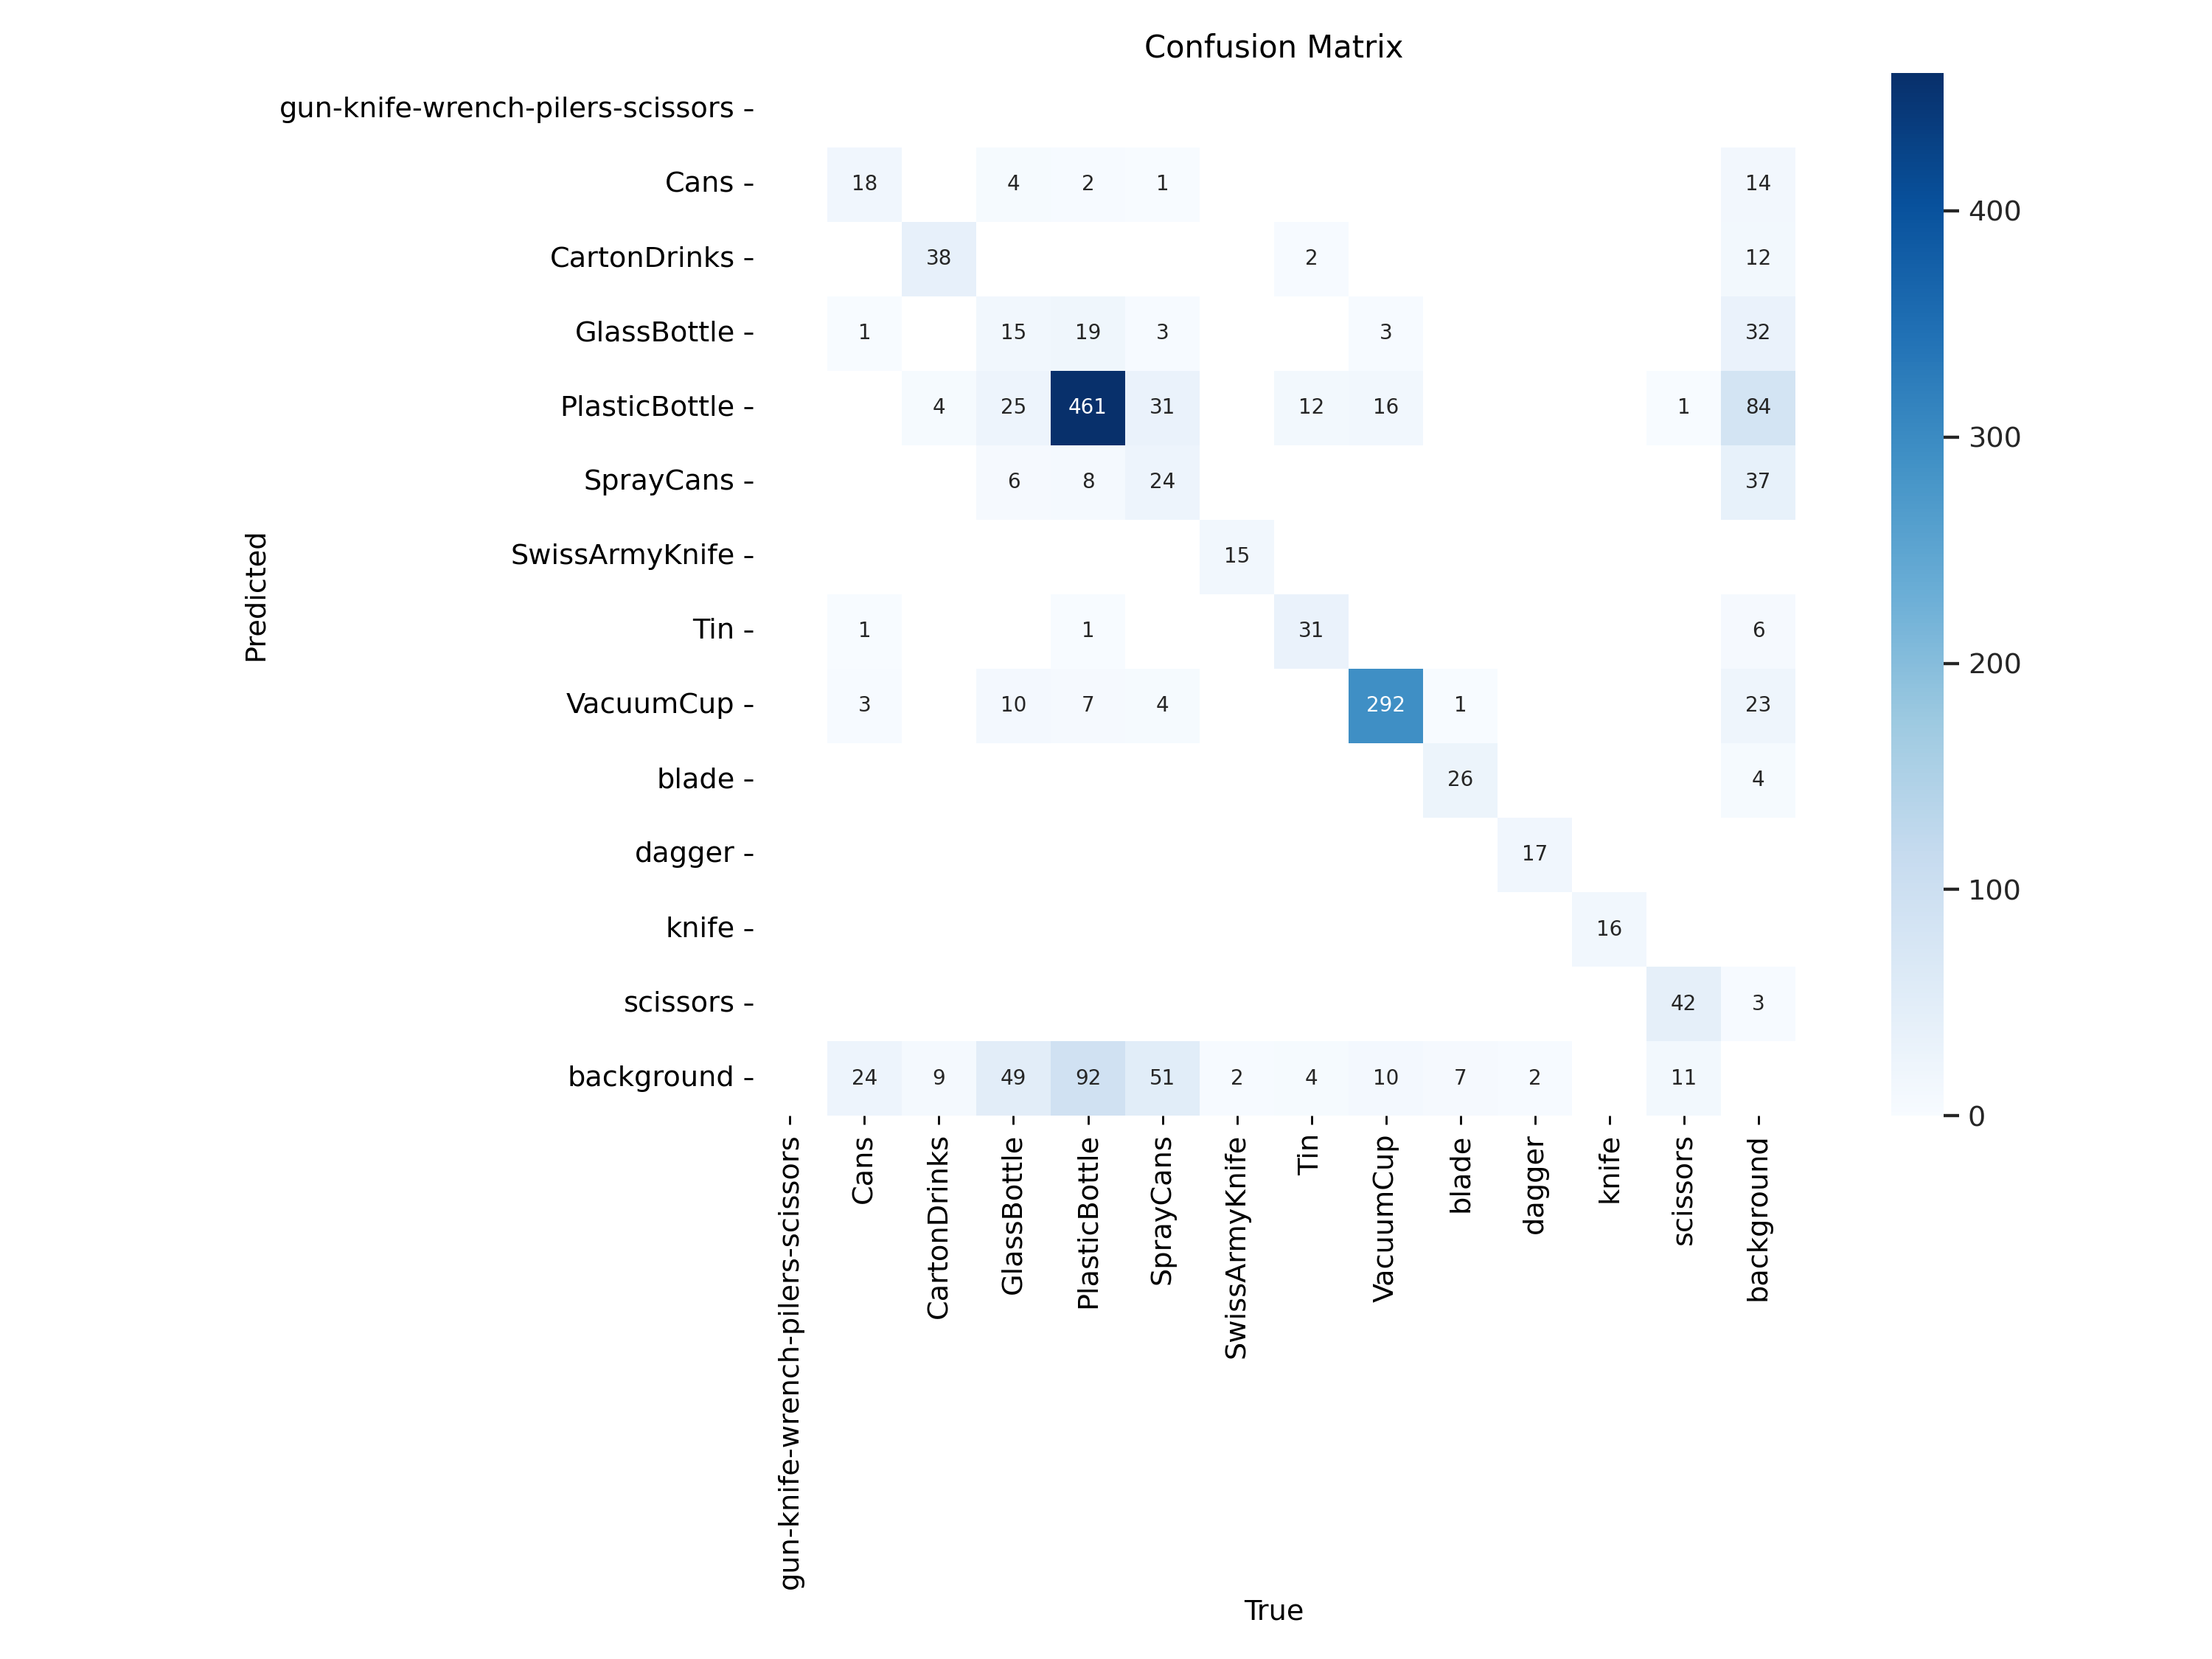

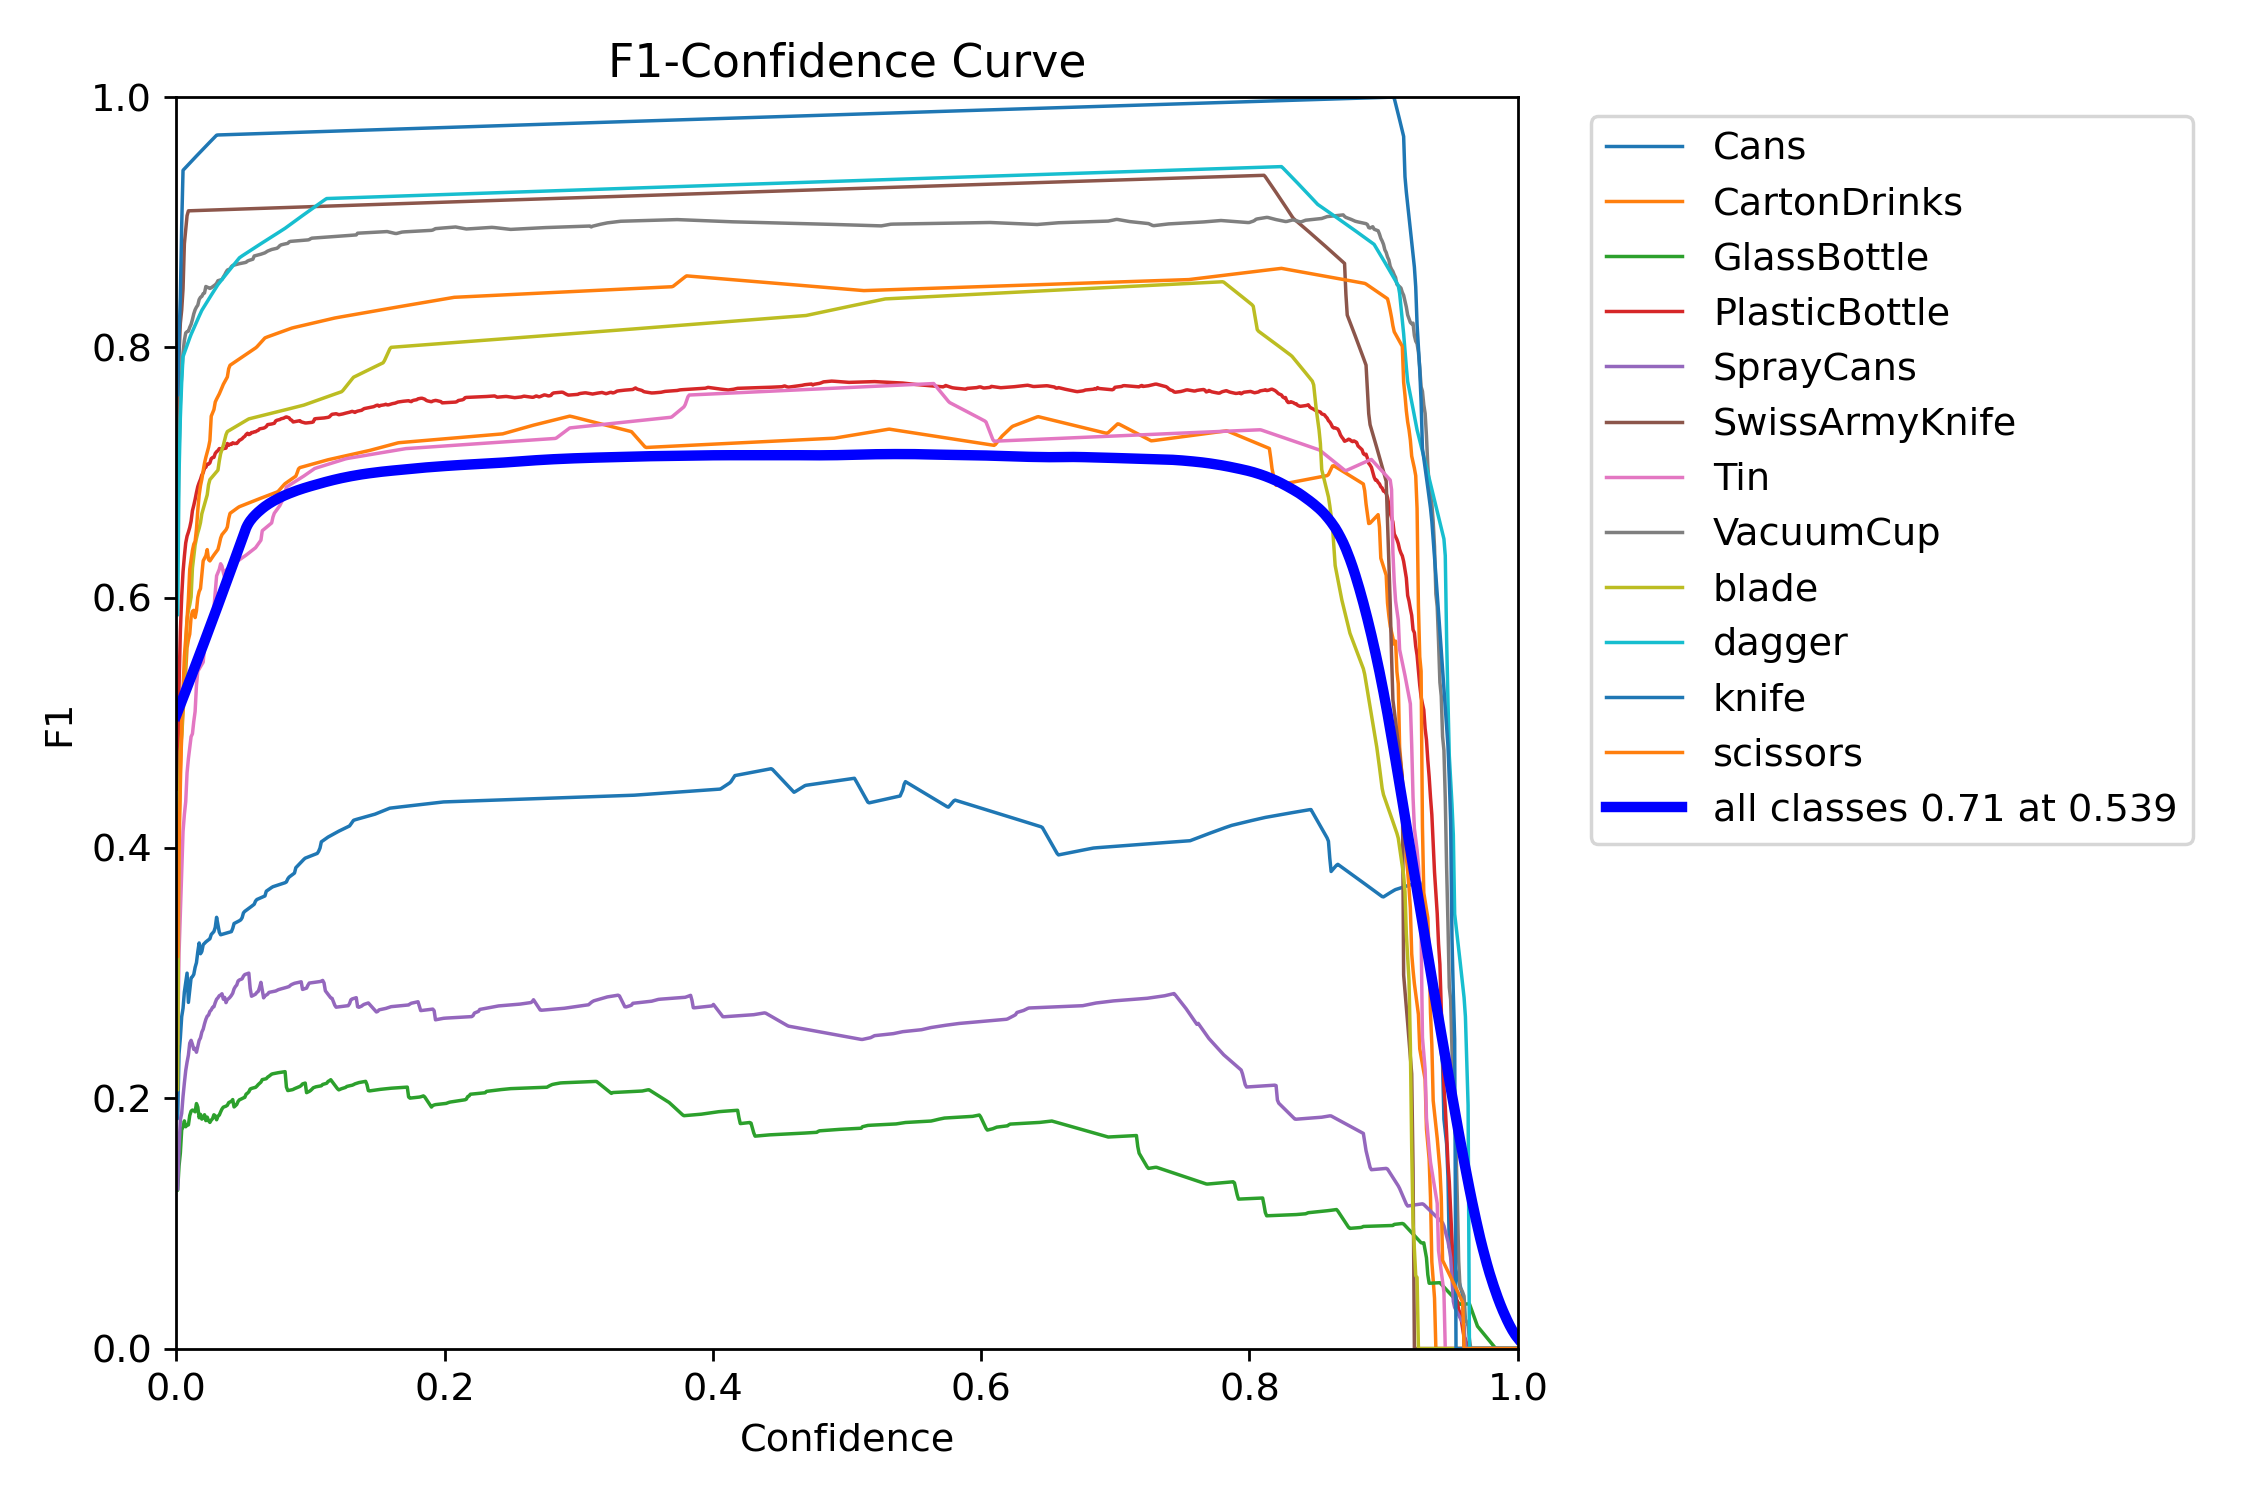

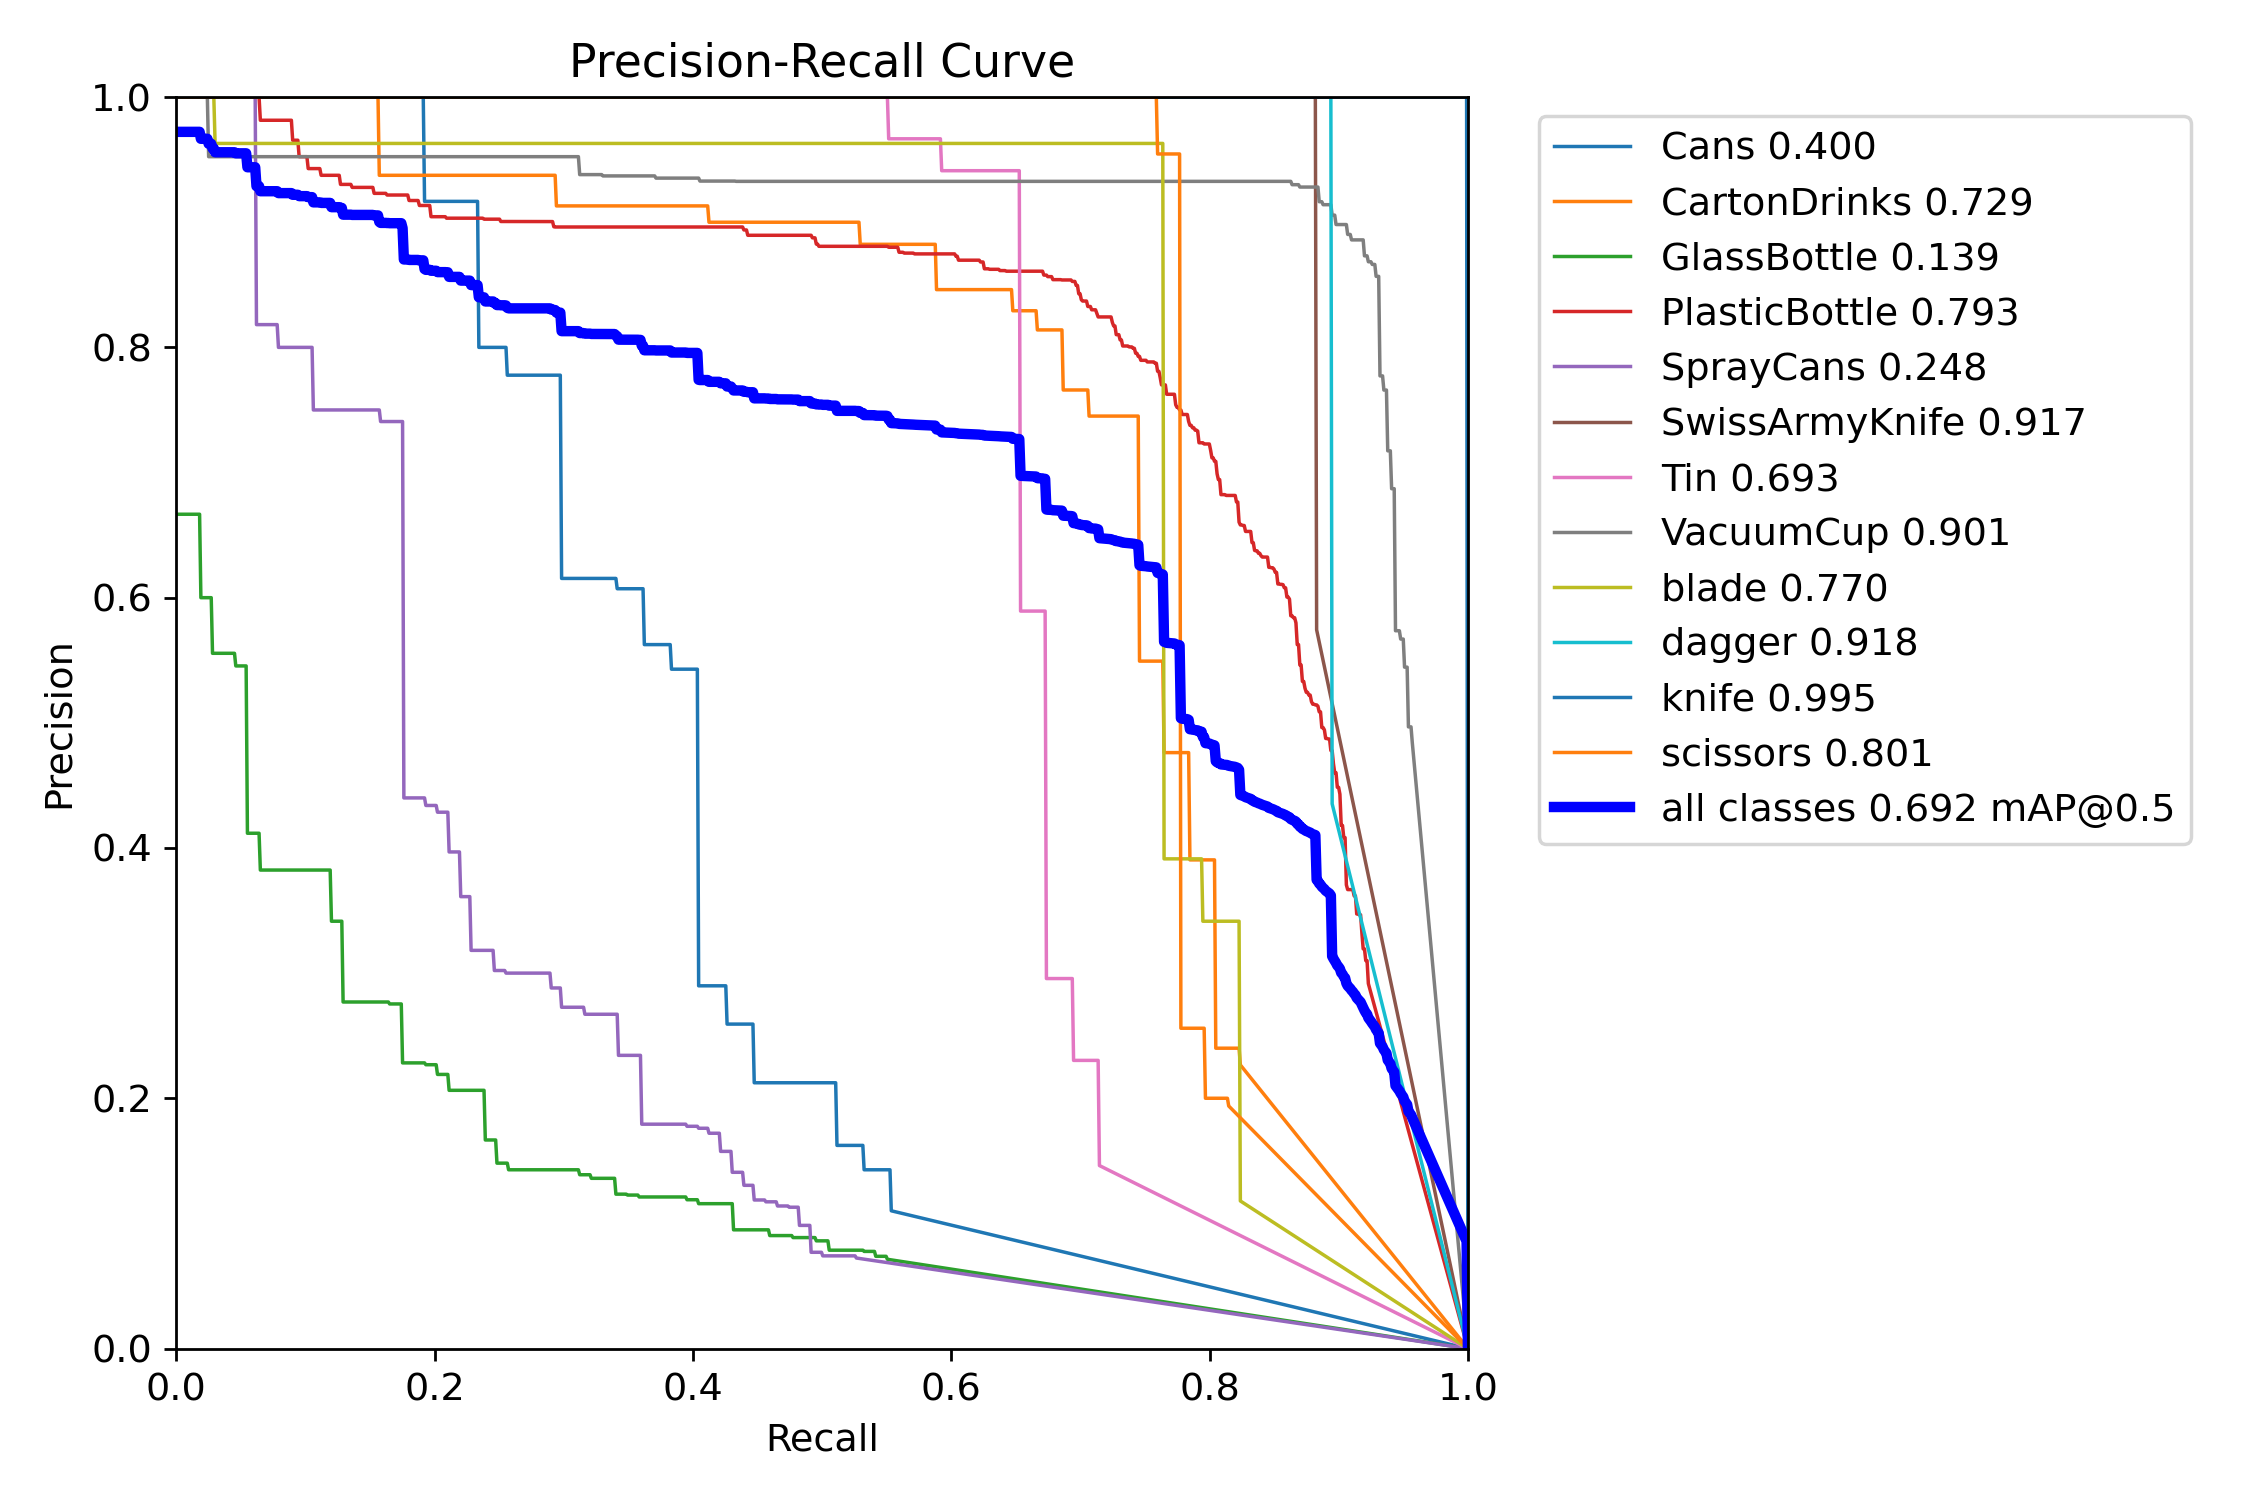

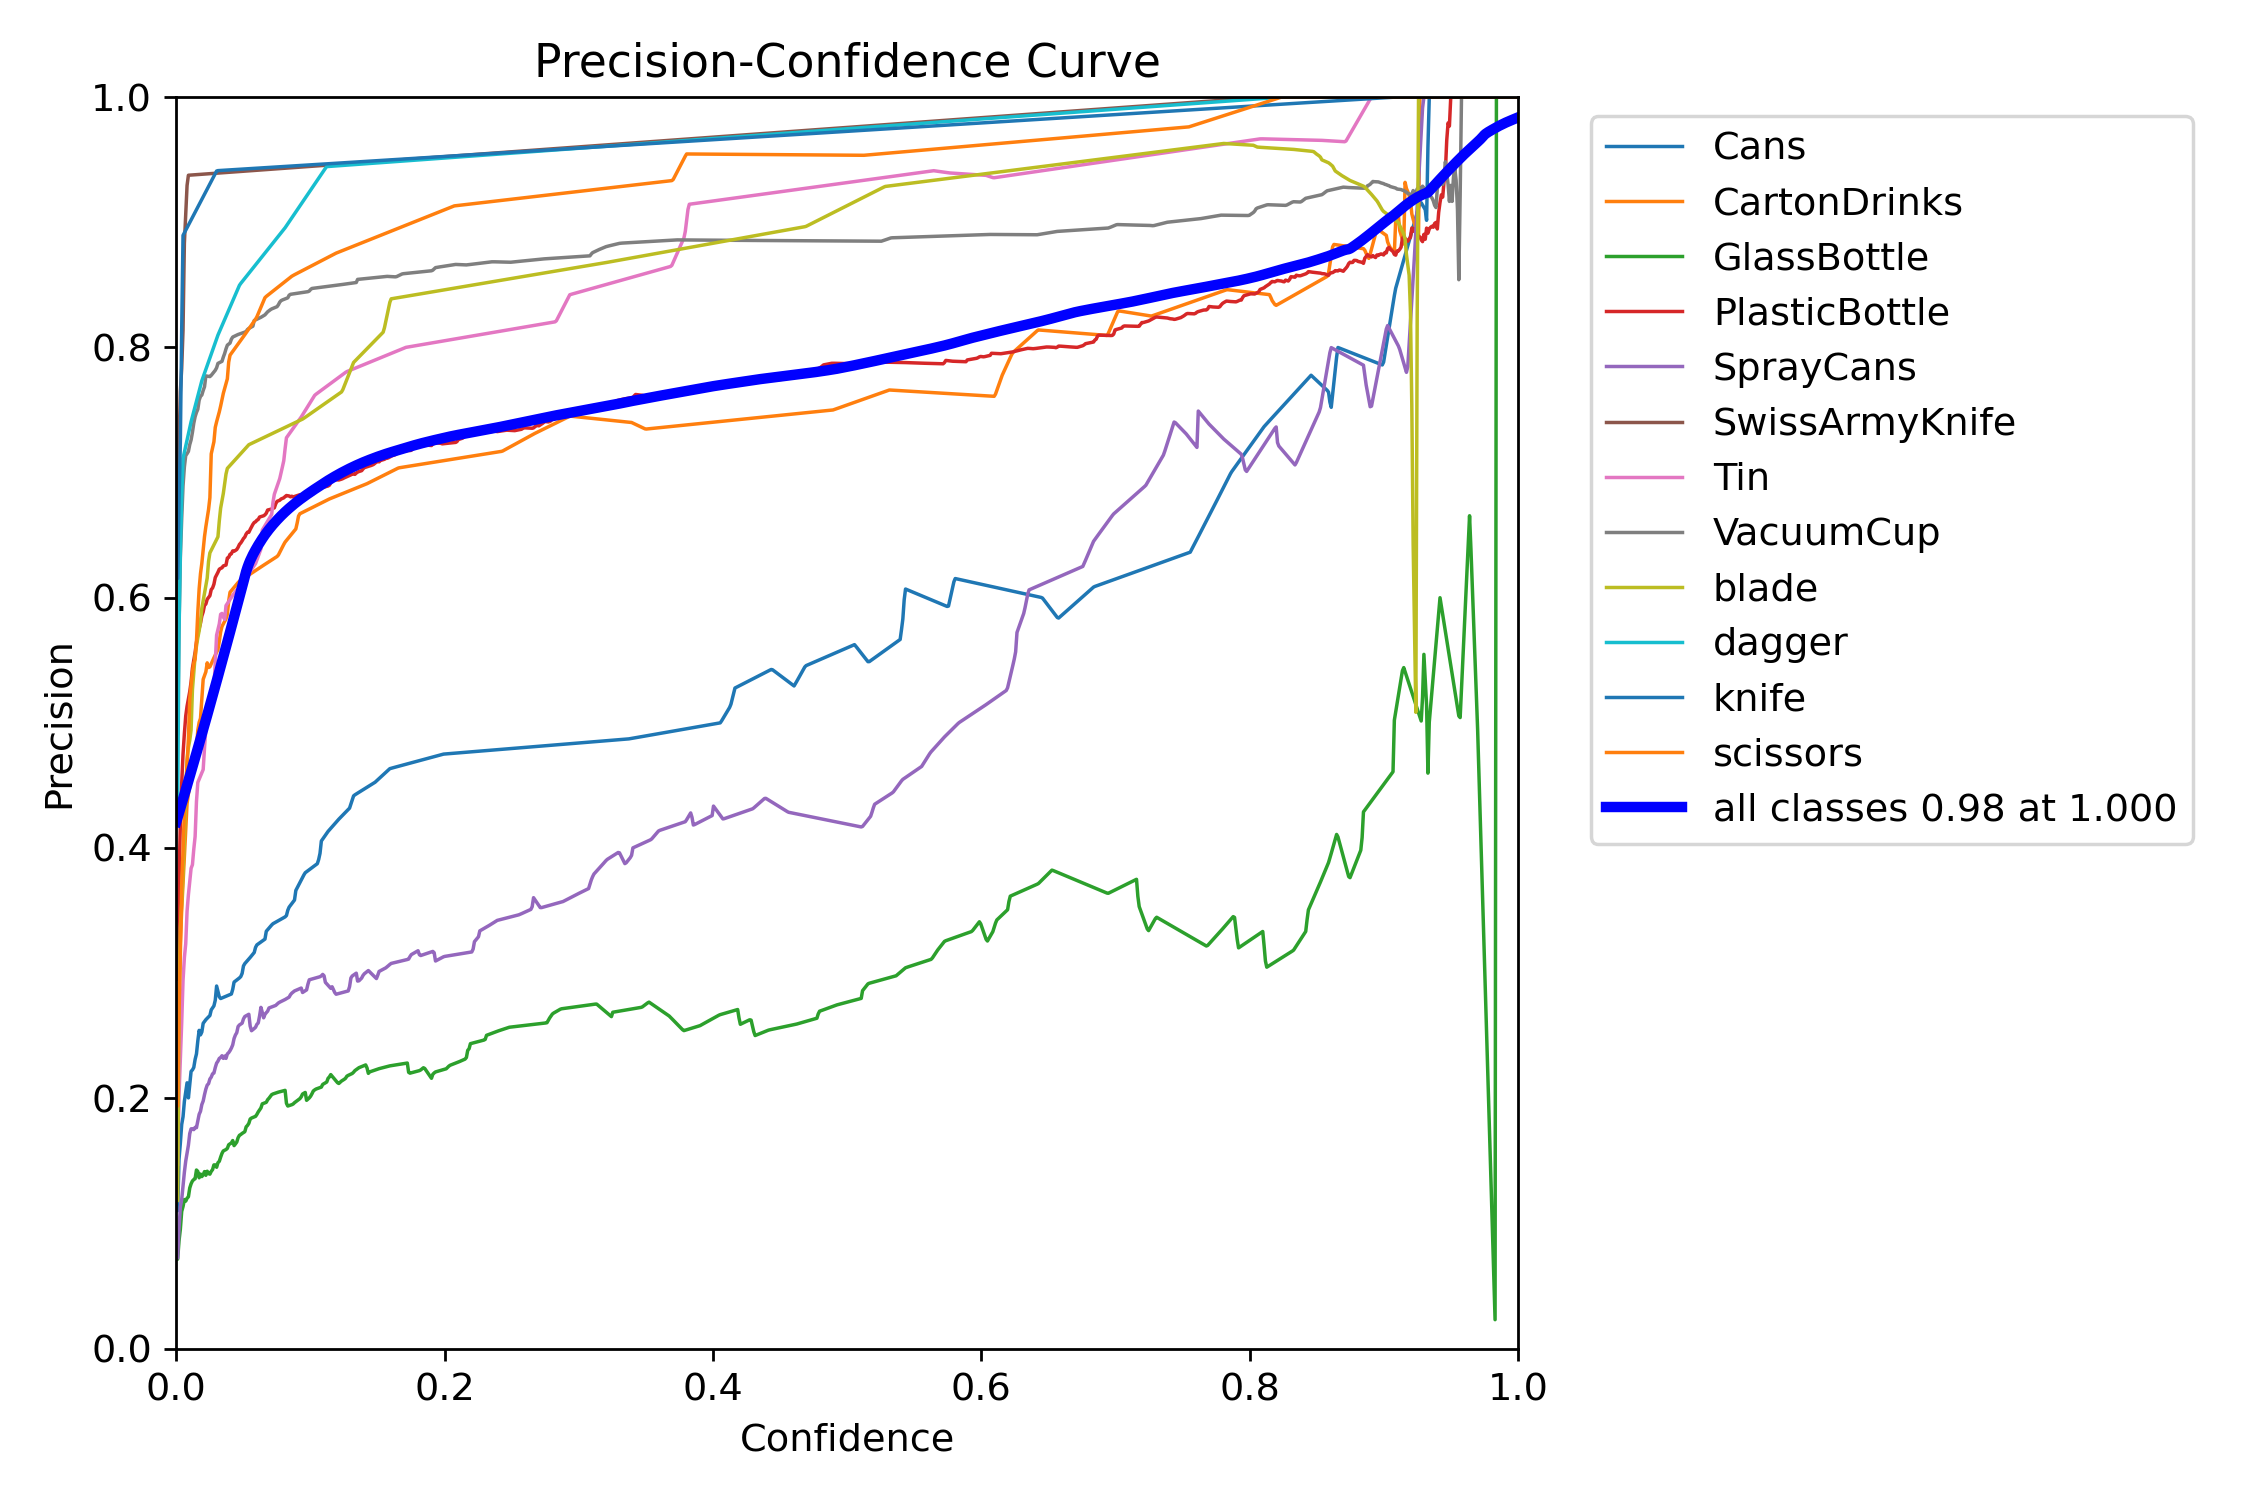

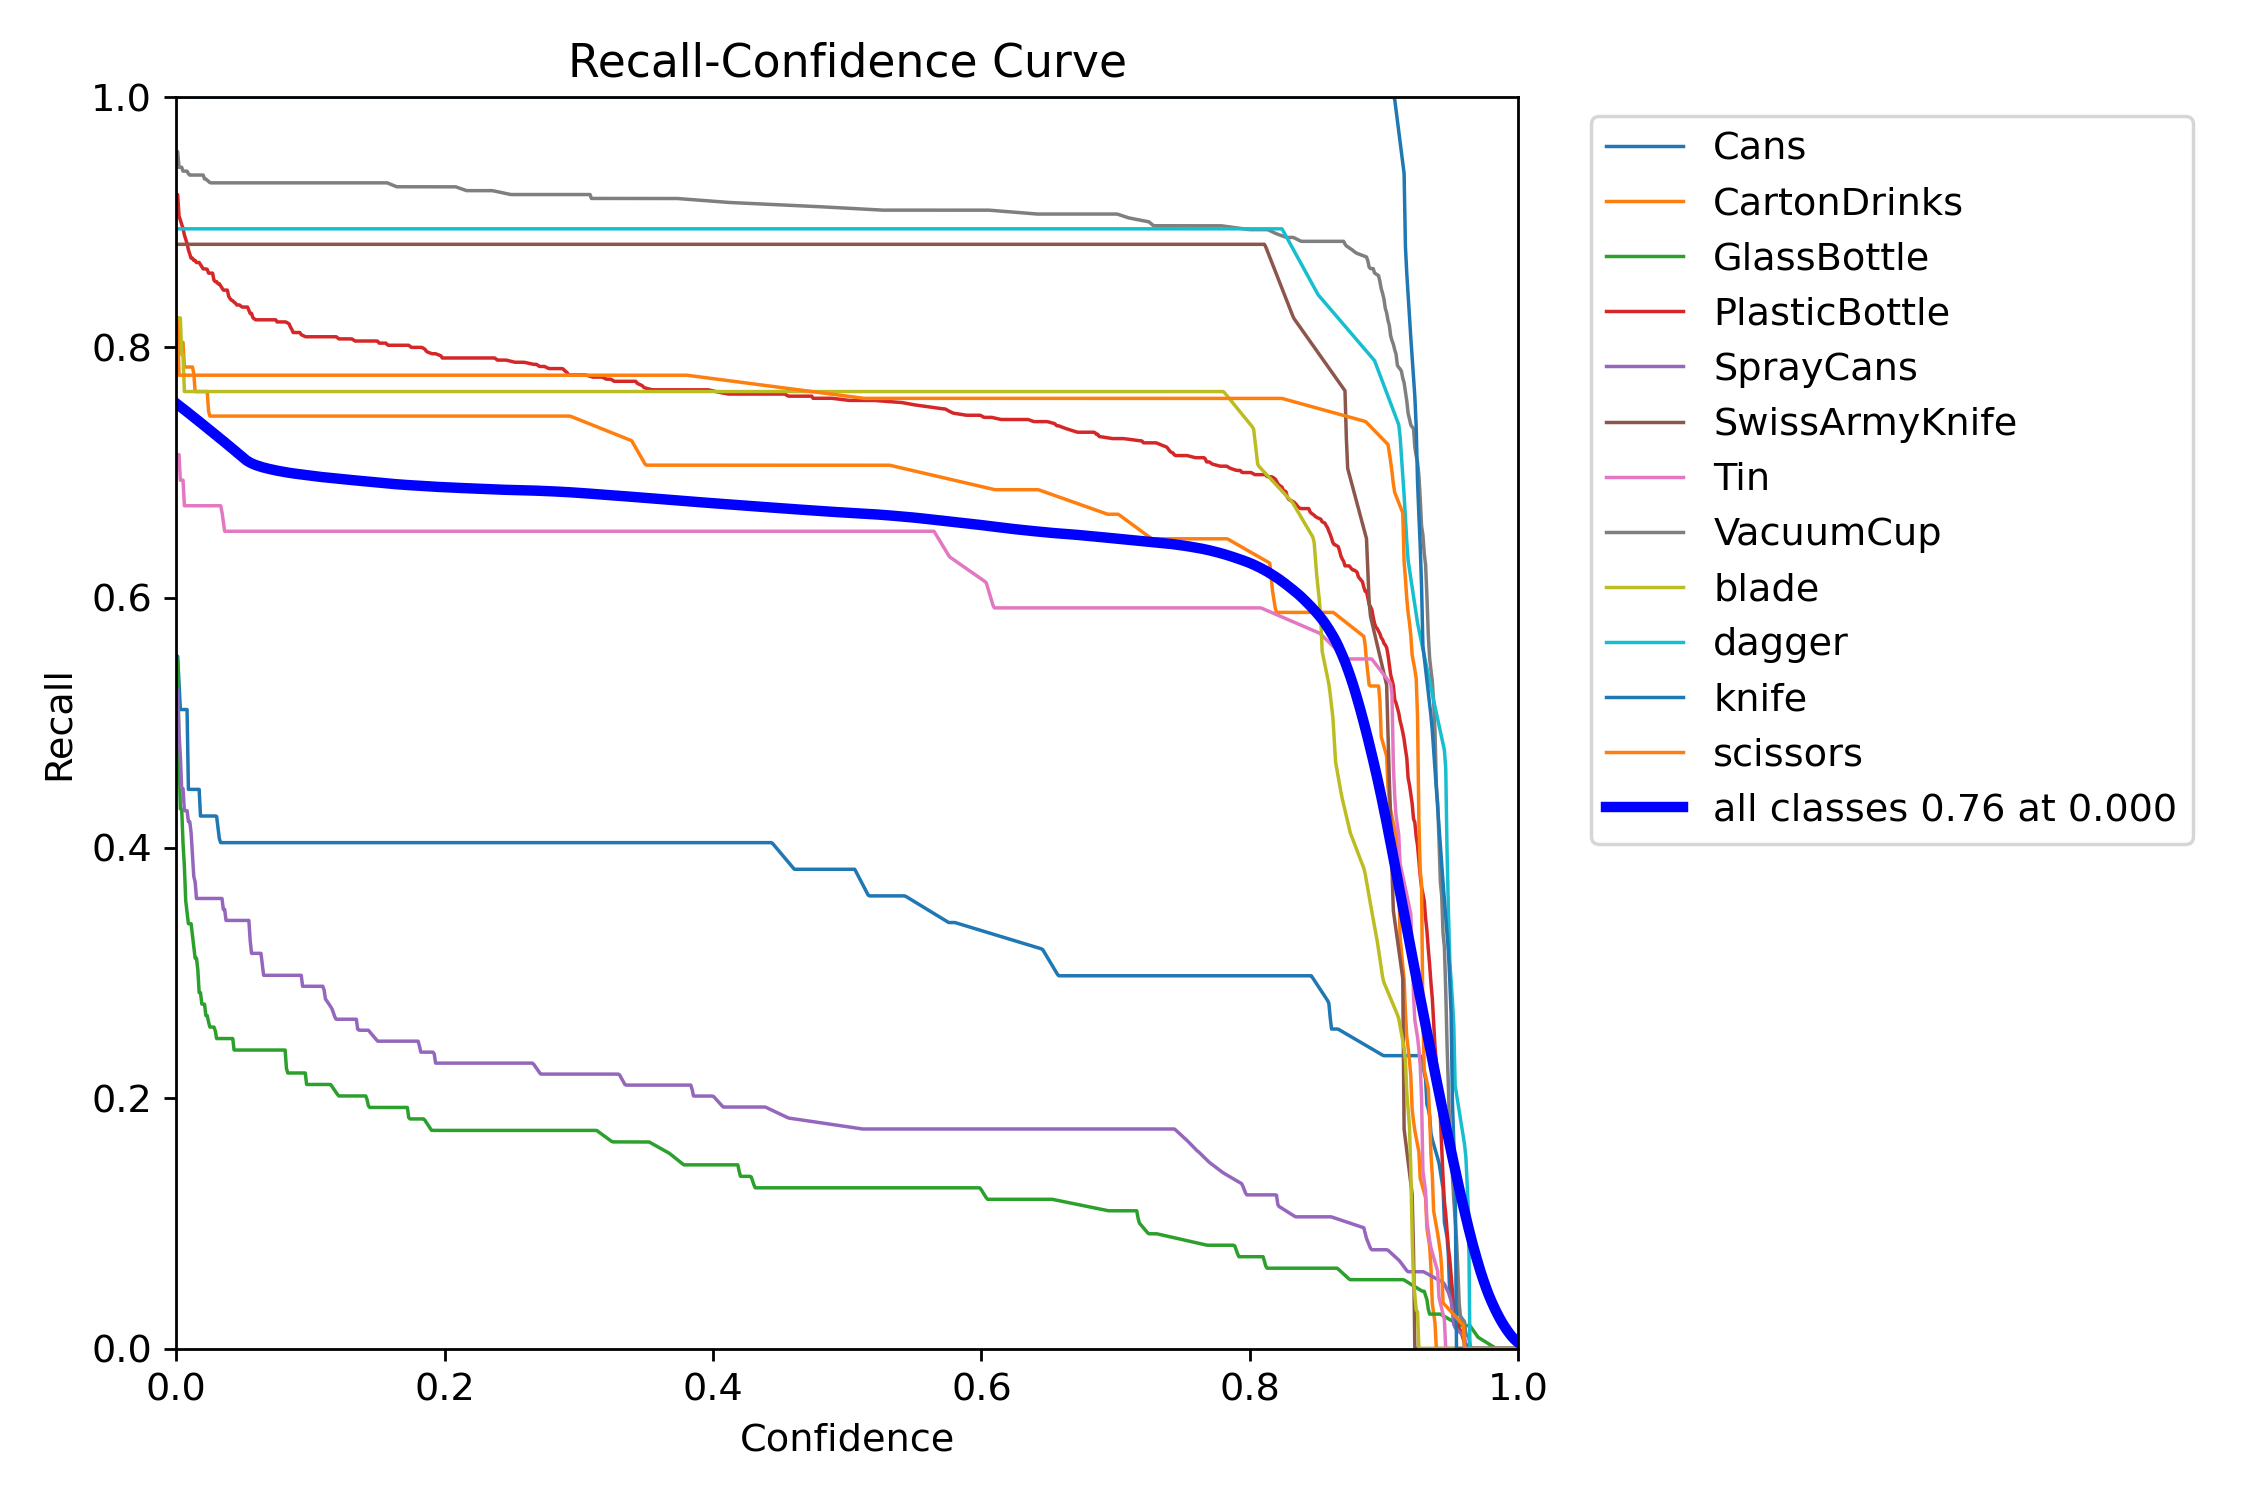

labels.jpg not found.


In [16]:
import os
from IPython.display import Image, display

eval_dir = "/kaggle/working/yolo_results_v8/test-eval"
plots = ["confusion_matrix.png", "F1_curve.png", "PR_curve.png", "P_curve.png", "R_curve.png", "labels.jpg"]

for plot in plots:
    plot_path = os.path.join(eval_dir, plot)
    if os.path.exists(plot_path):
        display(Image(filename=plot_path))
    else:
        print(f"{plot} not found.")


In [12]:
!zip -r /kaggle/working/yolo_outputs_v8.zip /kaggle/working/yolo_results_v8


  adding: kaggle/working/yolo_results_v8/ (stored 0%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/ (stored 0%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/PR_curve.png (deflated 11%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/labels.jpg (deflated 22%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/ (stored 0%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/best.pt (deflated 8%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/weights/last.pt (deflated 8%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/confusion_matrix.png (deflated 18%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/args.yaml (deflated 53%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/val_batch2_labels.jpg (deflated 10%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/R_curve.png (deflated 8%)
  adding: kaggle/working/yolo_results_v8/clc-xray-yolov8s/labels_correlogram.jpg (deflated 34%